# EMBEDDING
Embedding is a language modeling technique used for mapping words to vectors of real numbers. It represents words or phrases in vector space with several dimensions. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc.Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer.

In [3]:
import gensim

# TRAIN THE MODEL

In [4]:
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [5]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [6]:
len(new_model['university'])

C:\Users\YinYon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


100

In [7]:
new_model.similarity('university','school') > 0.3

C:\Users\YinYon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


True

# USING THE PRE-TRAINED MODEL

In [8]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [9]:
len(model.vocab)

43981

In [10]:
len(model['university'])

300

In [11]:
model.most_similar(positive=['university'], topn = 3)

[('universities', 0.7003918290138245),
 ('faculty', 0.6780907511711121),
 ('undergraduate', 0.6587096452713013)]

In [12]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

C:\Users\YinYon\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [13]:
model.most_similar(positive=['woman','king'], negative=['man'], topn = 1)

[('queen', 0.7118192911148071)]

In [14]:
model.most_similar(positive=['Paris','Germany'], negative=['Berlin'], topn = 1)

[('France', 0.7884091734886169)]

In [15]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model['university'])))

In [16]:
for term in model.vocab:
    X[count] = model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

In [17]:
# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

In [18]:
# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

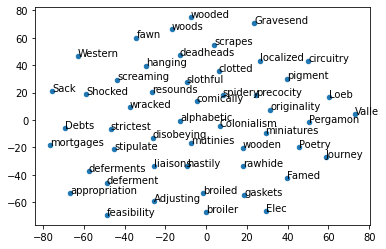

In [19]:
# Show the scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)
#Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()
